**Get the list of words**

In [1]:
# Get the dataset from Github
!wget --no-check-certificate \
    "https://raw.githubusercontent.com/dwyl/english-words/master/words.txt" \
    -O "/tmp/words.txt"

--2023-03-26 04:47:07--  https://raw.githubusercontent.com/dwyl/english-words/master/words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4862992 (4.6M) [text/plain]
Saving to: ‘/tmp/words.txt’

/tmp/words.txt      100%[===================>]   4.64M  --.-KB/s    in 0.09s   

2023-03-26 04:47:07 (51.6 MB/s) - ‘/tmp/words.txt’ saved [4862992/4862992]



**Open the words for processing**

In [2]:
words = open('/tmp/words.txt', 'r').read().splitlines()

**Basic Analysis of the word list**

In [3]:
words[:10]

['2',
 '1080',
 '&c',
 '10-point',
 '10th',
 '11-point',
 '12-point',
 '16-point',
 '18-point',
 '1st']

In [4]:
len(words)

466550

In [5]:
min(len(word) for word in words)

1

In [6]:
max(len(word) for word in words)

45

**Preprocess the words**

In [27]:
words = [word.lower() for word in words]

**Create a 2D Bigram**

In [28]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

**Create the bigram using Pytorch**

In [30]:
import torch

In [56]:
N = torch.zeros((44, 44), dtype=torch.int32)

In [57]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['<.>'] = 0;

itos = {i:s for s,i in stoi.items()}

In [58]:
for w in words:
  chs = ['<.>'] + list(w) + ['<.>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1][ix2] += 1

**Visualize the Bigram**

(-0.5, 43.5, 43.5, -0.5)

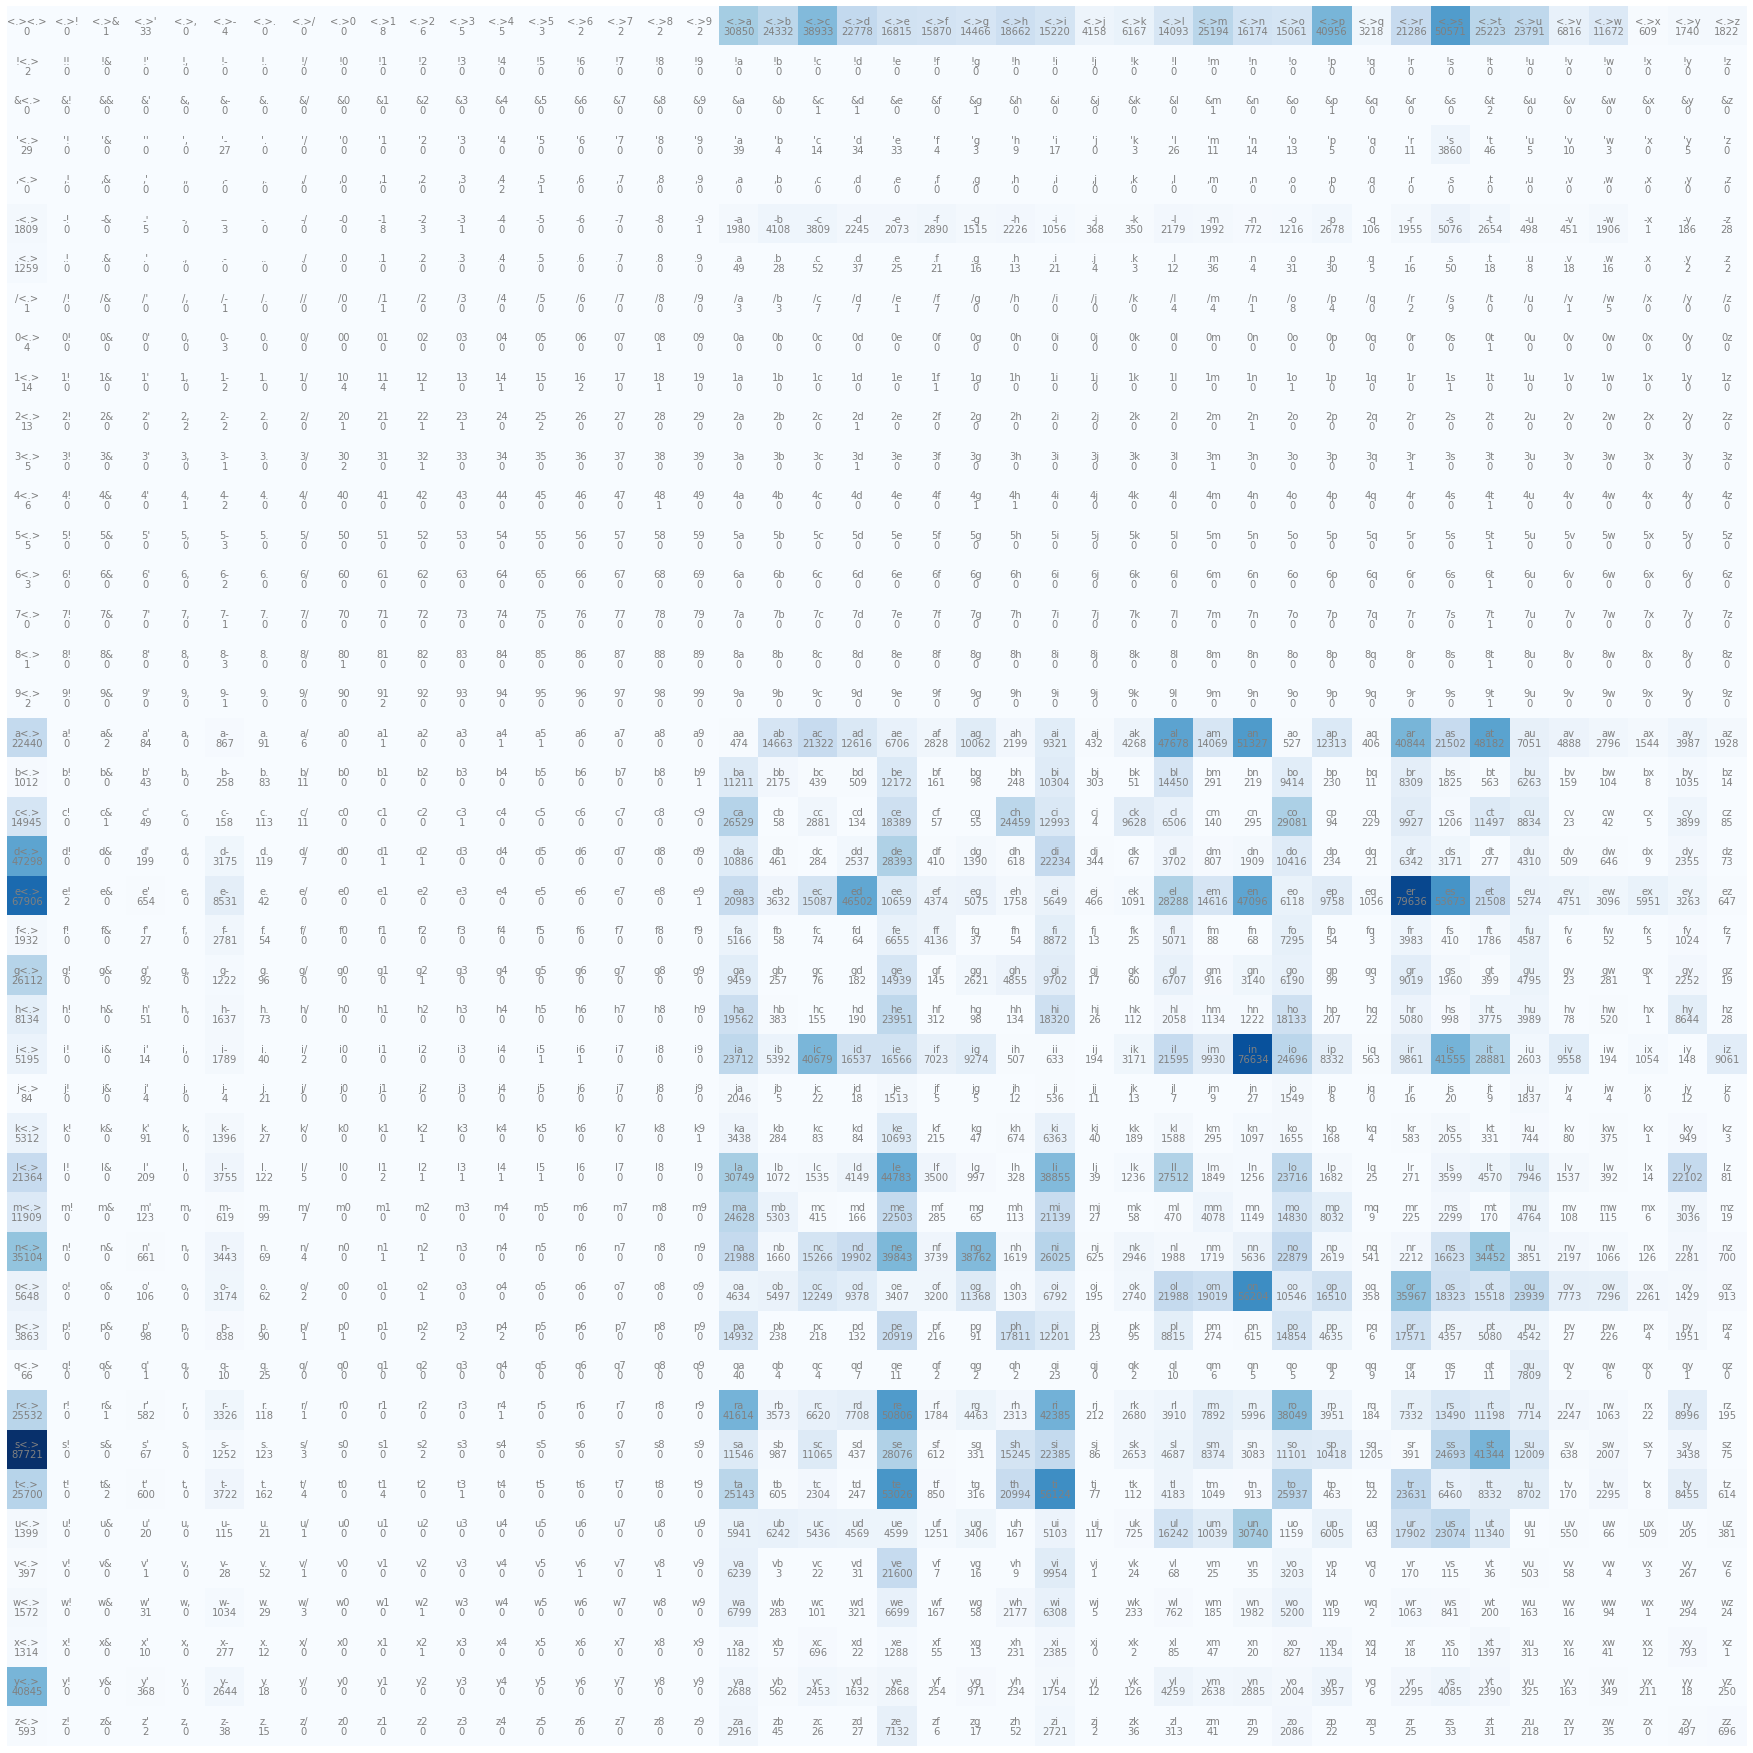

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(32,32))
plt.imshow(N, cmap='Blues')

for i in range(44):
  for j in range(44):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

**Normalize the Bigram Tensor**

In [61]:
P = N.float()
P = P / P.sum(1, keepdim=True)

# Scoring words

**Analysis of words**

In [69]:
for w in words[1:4]:
  log_likelihood = 0.0
  chs = ['<.>'] + list(w) + ['<.>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    print(f'{ch1}{ch2}: {prob:.8f} {logprob: .4f}')
  print(f'{log_likelihood=}')
  nll = -log_likelihood
  print(f'{nll=}')
  print(f'score: {nll/len(chs)}')

<.>1: 0.00001715 -10.9737
10: 0.12500000 -2.0794
08: 0.11111111 -2.1972
80: 0.16666667 -1.7918
0<.>: 0.44444445 -0.8109
log_likelihood=tensor(-17.8530)
nll=tensor(17.8530)
score: 2.9755055904388428
<.>&: 0.00000214 -13.0531
&c: 0.14285715 -1.9459
c<.>: 0.08196766 -2.5014
log_likelihood=tensor(-17.5005)
nll=tensor(17.5005)
score: 4.375115394592285
<.>1: 0.00001715 -10.9737
10: 0.12500000 -2.0794
0-: 0.33333334 -1.0986
-p: 0.05803068 -2.8468
po: 0.11024686 -2.2050
oi: 0.02206628 -3.8137
in: 0.20414230 -1.5889
nt: 0.11093937 -2.1988
t<.>: 0.09138525 -2.3927
log_likelihood=tensor(-29.1976)
nll=tensor(29.1976)
score: 2.9197633266448975
